# **Instalowanie potrzebnych komponentów**

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp


# **Problem maksymalizacji zysku z produkci okien**
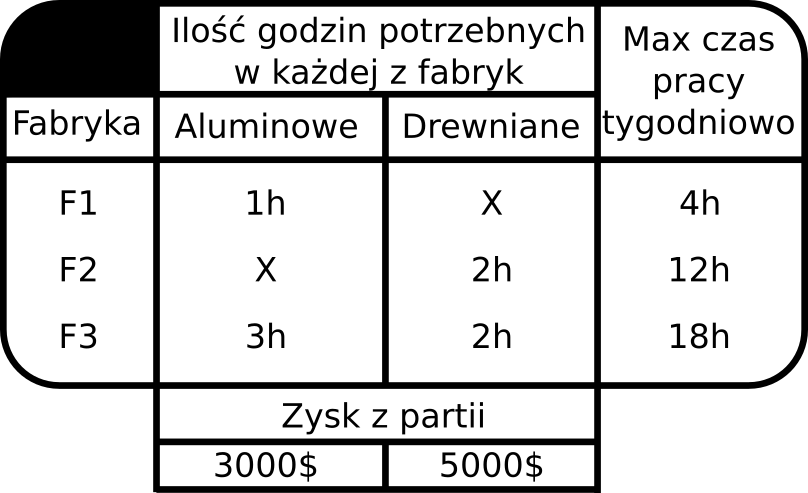

Wyprodukowanie tylku partii z każdego rodzaju okien by uzyskać jak największy zysk mając na uwadze ograniczenia dostępności fabryk jak ich czasu pracy.

In [2]:
from pulp import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

def prod_okien(
    h_alu_F1 = 1,
    h_alu_F2 = 0,
    h_alu_F3 = 3,
    h_wood_F1 = 0,
    h_wood_F2 = 2,
    h_wood_F3 = 2,
    max_h_F1 = 4,
    max_h_F2 = 12,
    max_h_F3 = 18,
    zysk_alu = 3000,
    zysk_wood = 5000
    ):
  
    
    prob = LpProblem("Maksymalizacja_zysku_z_okien",LpMaximize)

    x1=LpVariable("alu",0,None,LpInteger)
    x2=LpVariable("wood",0,None,LpInteger)

    prob += zysk_alu*x1 + zysk_wood*x2   #zysk
    prob += h_alu_F1*x1 + h_wood_F1*x2 <= max_h_F1, "Maks godziny/tyg w F1"
    prob += h_alu_F2*x1 + h_wood_F2*x2 <= max_h_F2, "Maks godziny/tyg w F2"
    prob += h_alu_F3*x1 + h_wood_F3*x2 <= max_h_F3, "Maks godziny/tyg w F3"

    if h_alu_F1 == 0 and h_alu_F2 == 0 and h_alu_F3 == 0: prob += x1 == 0
    if h_wood_F1 == 0 and h_wood_F2 == 0 and h_wood_F3 == 0: prob += x2 == 0

    prob.solve()

    vdict = {}
    for v in prob.variables():
        vdict[v.name] = str(v.varValue)

    print("Status:", LpStatus[prob.status],end='\n\n\n')
    print("Końcowy zysk na poziomie {}$, wyprodukowane partie: {}".format(value(prob.objective),vdict),end='\n\n')
    shadows = [{'name':name, 'shadow price': c.pi, "slack": c.slack} for name, c in prob.constraints.items()]
    print("Shadow Prices")
    print(pd.DataFrame(shadows))

style = {'description_width': 'initial'}
h_alu_F1_slider = FloatSlider(min=0,max=10,value=1,description="Godziny alu F1",style=style,step=0.5)
h_alu_F2_slider = FloatSlider(min=0,max=10,value=0,description="Godziny alu F2",style=style,step=0.5)
h_alu_F3_slider = FloatSlider(min=0,max=10,value=3,description="Godziny alu F3",style=style,step=0.5)
h_wood_F1_slider = FloatSlider(min=0,max=10,value=0,description="Godziny wood F1",style=style,step=0.5)
h_wood_F2_slider = FloatSlider(min=0,max=10,value=2,description="Godziny wood F2",style=style,step=0.5)
h_wood_F3_slider = FloatSlider(min=0,max=10,value=2,description="Godziny wood F3",style=style,step=0.5)
max_h_F1_slider = FloatSlider(min=0,max=50,value=4,description="Maks godz. F1",style=style,step=0.5)
max_h_F2_slider = FloatSlider(min=0,max=50,value=12,description="Maks godz. F2",style=style,step=0.5)
max_h_F3_slider = FloatSlider(min=0,max=50,value=18,description="Maks godz. F3",style=style,step=0.5)
zysk_alu_slider = FloatSlider(min=500,max=10000,value=3000,description="Zysk alu",style=style,step=100)
zysk_wood_slider = FloatSlider(min=500,max=10000,value=5000,description="Zysk wood",style=style,step=100)

interact(
    prod_okien,
    h_alu_F1 = h_alu_F1_slider,
    h_alu_F2 = h_alu_F2_slider,
    h_alu_F3 = h_alu_F3_slider,
    h_wood_F1 = h_wood_F1_slider,
    h_wood_F2 = h_wood_F2_slider,
    h_wood_F3 = h_wood_F3_slider,
    max_h_F1 = max_h_F1_slider,
    max_h_F2 = max_h_F2_slider,
    max_h_F3 = max_h_F3_slider,
    zysk_alu = zysk_alu_slider,
    zysk_wood = zysk_wood_slider
)

interactive(children=(FloatSlider(value=1.0, description='Godziny alu F1', max=10.0, step=0.5, style=SliderSty…

<function __main__.prod_okien>